In [ ]:
# Import Required Libraries for K-Means Clustering Implementation
import matplotlib.pyplot as plt  # For data visualization and plotting
import numpy as np              # For numerical computations and array operations
import pandas as pd             # For data manipulation and analysis
import seaborn as sns           # For enhanced statistical visualizations
from sklearn.decomposition import PCA                # For dimensionality reduction and visualization
from IPython.display import clear_output             # For dynamic plot updates during iterations

In [ ]:
# Load FIFA 24 male players dataset
# This dataset contains detailed statistics for professional football players
players = pd.read_csv('Datasets\male_fc_24_players.csv')

# Display the first 5 rows to understand the dataset structure
# Shows player names, ratings, and various performance metrics
players.head()

,Unnamed: 0,name,nation,club,position,alternative positions,age,overall,PAC,SHO,...,att work rate,def work rate,skill moves,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Gender
0,0,Kylian Mbappé,France,Paris SG,ST,"ST, LW, CF",25,91,97,90,...,High,Low,5,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
1,2,Erling Haaland,Norway,Manchester City,ST,"ST, CF",24,91,89,93,...,High,Medium,3,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
2,3,Kevin De Bruyne,Belgium,Manchester City,CM,"CM, CAM",33,91,72,88,...,High,Medium,4,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
3,5,Lionel Messi,Argentina,Inter Miami CF,CF,"CF, CAM, ST",37,90,80,87,...,Low,Low,4,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M
4,7,Karim Benzema,France,Al Ittihad,CF,"CF, ST",36,90,79,88,...,Medium,Medium,4,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN,M


In [ ]:
# Select key performance features for clustering analysis
# These 7 features represent core player attributes:
# - age: Player age
# - overall: Overall rating (0-100)
# - PAC: Pace/Speed rating
# - SHO: Shooting ability rating  
# - DRI: Dribbling skills rating
# - DEF: Defensive abilities rating
# - PHY: Physical attributes rating
features = ['age', 'overall', 'PAC', 'SHO', 'DRI', 'DEF', 'PHY']

# Remove players with missing values in any of the selected features
# This ensures clean data for clustering algorithm
players = players.dropna(subset=features)

In [ ]:
# Extract only the selected features for clustering
# Create a copy to avoid modifying the original dataset
data = players[features].copy()

# Display the extracted features dataset
# This shows only the 7 numerical features we'll use for clustering
data

,age,overall,PAC,SHO,DRI,DEF,PHY
0,25,91,97,90,92,36,78
1,24,91,89,93,80,45,88
2,33,91,72,88,87,65,78
3,37,90,80,87,94,33,64
4,36,90,79,88,87,39,78
...,...,...,...,...,...,...,...
11479,30,86,81,73,84,80,72
11480,39,86,77,88,80,34,74
11481,25,86,76,69,79,80,73
11482,34,86,86,83,87,49,86


In [ ]:
# Apply Z-score normalization (standardization) to the data
# This transforms each feature to have mean=0 and standard deviation=1
# Standardization is crucial for K-Means because:
# 1. All features contribute equally to distance calculations
# 2. Features with larger scales don't dominate the clustering
# 3. Improves convergence speed and stability
data = (data - data.mean()) / data.std() 

# Display statistical summary of normalized data
# All features should now have mean≈0 and std≈1
data.describe()

,age,overall,PAC,SHO,DRI,DEF,PHY
count,1.148400e+04,1.148400e+04,1.148400e+04,1.148400e+04,1.148400e+04,1.148400e+04,1.148400e+04
mean,3.594014e-16,1.633432e-15,-1.013547e-16,4.106781e-16,7.402260e-16,1.192591e-16,1.573879e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.924953e+00,-1.547419e+00,-2.969042e+00,-3.328583e+00,-3.325211e+00,-1.836471e+00,-2.463314e+00
25%,-7.678773e-01,-9.050942e-01,-6.565710e-01,-3.762747e-01,-5.838157e-01,-8.964763e-01,-6.568838e-01
50%,1.577830e-01,-2.627693e-01,1.477666e-01,3.183862e-01,3.299828e-01,1.740731e-02,1.259027e-01
75%,6.206131e-01,1.021881e+00,6.504775e-01,6.657167e-01,6.345823e-01,9.312909e-01,7.882606e-01
max,2.240519e+00,2.306530e+00,1.856984e+00,1.360378e+00,1.548381e+00,1.401288e+00,1.510833e+00


In [ ]:
# Display first few rows of standardized data
# Values should now be centered around 0 with similar scales
# Positive values = above average, Negative values = below average
data.head()

,age,overall,PAC,SHO,DRI,DEF,PHY
0,-0.999292,2.306530,1.856984,1.099880,1.243781,-1.366474,0.065688
1,-1.230707,2.306530,1.052646,1.360378,-0.583816,-0.896476,1.269975
2,0.852028,2.306530,-0.656571,0.926215,0.482283,0.147962,0.065688
3,1.777688,1.664205,0.147767,0.839382,1.548381,-1.523139,-1.620313
4,1.546273,1.664205,0.047224,0.926215,0.482283,-1.209808,0.065688


In [ ]:
# Custom K-Means Clustering Implementation from Scratch
# This class implements Lloyd's algorithm for K-Means clustering
class KMeansClustering:
    def __init__(self, k=3, max_iterations=100, random_state=None):
        """
        Initialize K-Means clustering algorithm
        
        Parameters:
        k (int): Number of clusters to create
        max_iterations (int): Maximum number of iterations before stopping
        random_state (int): Random seed for reproducible results
        """
        self.k = k                           # Number of clusters
        self.max_iteration = max_iterations  # Maximum iterations
        self.random_state = random_state     # Random seed for reproducibility

        # Initialize algorithm state variables
        self.centroids = None    # Cluster centers (will be k x n_features array)
        self.labels = None       # Cluster assignments for each data point
        self.n_iterations = 0    # Number of iterations performed
        self.inertia = None      # Within-cluster sum of squares (measure of compactness)

    def initialize_centroids(self, data):
        """
        Initialize k centroids randomly within the data bounds
        This ensures centroids start within the feature space range
        """
        # Set random seed for reproducible centroid initialization
        if self.random_state:
            np.random.seed(self.random_state)

        # Get min and max values for each feature to define bounds
        min_vals = data.min().values if hasattr(data, 'values') else data.min(axis=0)
        max_vals = data.max().values if hasattr(data, 'values') else data.max(axis=0)
        
        # Generate k random centroids within feature bounds
        # Shape: (k clusters, n_features)
        centroids = np.random.uniform(min_vals, max_vals, size=(self.k, len(data.columns)))
        return centroids
    
    def calculate_distances(self, data):
        """
        Calculate Euclidean distances from each data point to all centroids
        Returns: distance matrix of shape (n_samples, k_clusters)
        """
        # Convert DataFrame to numpy array if needed
        data_array = data.values if hasattr(data, 'values') else data
        distances = []

        # Calculate distance from each point to each centroid
        for i, centroid in enumerate(self.centroids):
            # Euclidean distance: sqrt(sum((x - centroid)²))
            dist = np.sqrt(np.sum((data_array - centroid) ** 2, axis=1))
            distances.append(dist)
        
        # Transpose to get shape (n_samples, k_clusters)
        distances = np.array(distances).T
        return distances
    
    def assign_labels(self, distances):
        """
        Assign each data point to the nearest centroid
        Returns: cluster labels for each data point
        """
        # Find the index of minimum distance (nearest centroid) for each point
        labels = np.argmin(distances, axis=1)
        return labels
    
    def update_centroids(self, data, labels):
        """
        Update centroids as the mean of points assigned to each cluster
        This is the core of Lloyd's algorithm
        """
        data_array = data.values if hasattr(data, 'values') else data
        new_centroids = []

        # Update each centroid
        for cluster_id in range(self.k):
            # Get all points assigned to this cluster
            cluster_points = data_array[labels == cluster_id]

            if len(cluster_points) > 0:
                # New centroid = mean of assigned points
                new_centroid = cluster_points.mean(axis=0)
            else:
                # Handle empty cluster by assigning random data point
                new_centroid = data_array[np.random.randint(0, len(data_array))]
            new_centroids.append(new_centroid)
        
        return np.array(new_centroids)
    
    def calculate_inertia(self, data, labels):
        """
        Calculate within-cluster sum of squares (inertia)
        Lower inertia indicates more compact clusters
        """
        data_array = data.values if hasattr(data, 'values') else data
        inertia = 0.0

        # Sum squared distances from points to their assigned centroids
        for cluster_id in range(self.k):
            cluster_points = data_array[labels == cluster_id]
            if len(cluster_points) > 0:
                centroid = self.centroids[cluster_id]
                # Add sum of squared distances for this cluster
                inertia += np.sum((cluster_points - centroid) ** 2)

        return inertia
    
    def fit(self, data, plot=True):
        """
        Main training method implementing Lloyd's algorithm
        
        Algorithm steps:
        1. Initialize centroids randomly
        2. Assign points to nearest centroids
        3. Update centroids as cluster means
        4. Repeat until convergence or max iterations
        """
        # Step 1: Initialize centroids
        self.centroids = self.initialize_centroids(data)

        old_centroids = None
        self.n_iterations = 0

        # Lloyd's algorithm main loop
        for iteration in range(1, self.max_iteration + 1):
            # Check for convergence (centroids stop moving significantly)
            if old_centroids is not None:
                centroid_diff = np.abs(self.centroids - old_centroids).max()
                if centroid_diff < 1e-4:  # Convergence threshold
                    print(f"Converged after {iteration-1} iterations!")
                    break

            # Save current centroids to check convergence
            old_centroids = self.centroids.copy()

            # Step 2: Calculate distances and assign labels
            distances = self.calculate_distances(data)
            self.labels = self.assign_labels(distances)
            
            # Step 3: Update centroids
            self.centroids = self.update_centroids(data, self.labels)

            # Optional: Plot clustering progress
            if plot:
                self.plot_iterations(data, self.labels, self.centroids, iteration)
            self.n_iterations = iteration

        # Calculate final clustering quality measure
        self.inertia = self.calculate_inertia(data, self.labels)
        print(f"Final inertia: {self.inertia:.2f}")
        return self
    
    def plot_iterations(self, data, labels, centroids, iteration):
        """
        Visualize clustering progress using PCA for dimensionality reduction
        Shows data points colored by cluster and centroids as red X's
        """
        # Use PCA to reduce 7D data to 2D for visualization
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(data)
        centroids_2d = pca.transform(centroids)

        # Clear previous plot for animation effect
        clear_output(wait=True)

        # Create clustering visualization
        plt.figure(figsize=(8, 6))
        plt.title(f'K-Means Clustering - Iteration {iteration}')

        # Plot data points colored by cluster assignment
        scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)
        # Plot centroids as red X markers
        plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
        
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(scatter, label='Cluster')
        plt.grid(True)
        plt.legend()
        plt.show()

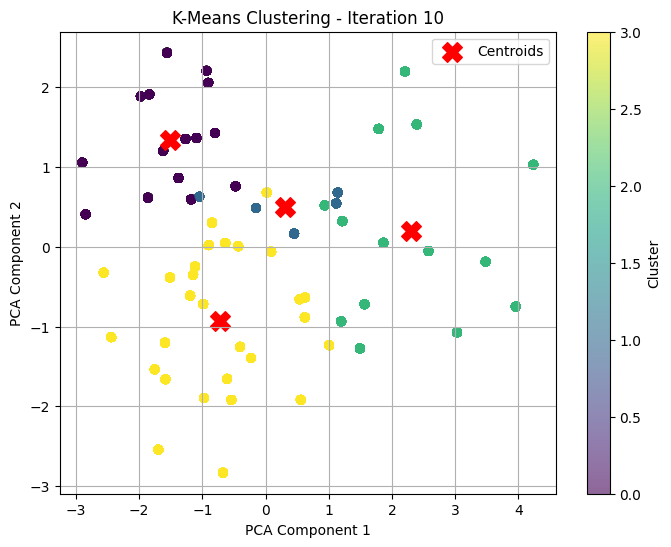

Converged after 10 iterations!
Final inertia: 39506.42


In [ ]:
# Train the custom K-Means model
# Parameters:
# - k=4: Create 4 clusters (good for player segmentation)
# - max_iterations=100: Stop if algorithm doesn't converge
# - random_state=42: Ensure reproducible results
# - plot=True: Show real-time visualization of clustering process
kmc = KMeansClustering(k=4, max_iterations=100, random_state=42)
kmc.fit(data, plot=True)

In [ ]:
# Display the final centroids (cluster centers) from our custom implementation
# Each row represents one cluster center in the standardized feature space
# These are the "average player profiles" for each cluster
print("Custom K-Means Centroids:")
print(kmc.centroids)

kmc.centroids:
[[ 0.65146847  1.2788105   0.42928471  0.93200337  0.59396904 -0.73284764
   0.54740319]
 [ 1.5462734  -0.77662921 -1.64188454  0.37048581 -0.15737641  0.10618458
  -0.82548401]
 [-0.17648321 -0.15571513 -0.58954288 -1.26872094 -1.27762572  1.21851152
   0.55409368]
 [-0.51166773 -0.44629068  0.44221157  0.25016062  0.53123605 -0.40969341
  -0.50204693]]


In [ ]:
# Compare with scikit-learn's K-Means implementation
# Use same parameters for fair comparison
from sklearn.cluster import KMeans

# Initialize scikit-learn K-Means with identical parameters
km = KMeans(n_clusters=4, random_state=42)

# Fit the model to our standardized data
km.fit(data)

# Display the cluster centers
km.cluster_centers_

array([[ 0.06521697, -0.23065304, -0.92803494, -1.07527717, -1.16255479,
         1.11928986,  0.3426744 ],
       [-0.56731754, -0.3484126 ,  0.4225819 ,  0.17945406,  0.27921622,
         0.10966604,  0.47514597],
       [ 0.77488984,  1.19316718,  0.36895939,  0.96673641,  0.53304914,
        -0.83729148,  0.45106023],
       [-0.27612025, -0.50364112,  0.41797372,  0.2695429 ,  0.69169472,
        -0.71696347, -1.29666131]])

In [ ]:
print("Scikit-learn K-Means Centroids:")
pd.DataFrame(km.cluster_centers_, columns=data.columns)

,age,overall,PAC,SHO,DRI,DEF,PHY
0,0.065217,-0.230653,-0.928035,-1.075277,-1.162555,1.119290,0.342674
1,-0.567318,-0.348413,0.422582,0.179454,0.279216,0.109666,0.475146
2,0.774890,1.193167,0.368959,0.966736,0.533049,-0.837291,0.451060
3,-0.276120,-0.503641,0.417974,0.269543,0.691695,-0.716963,-1.296661


In [ ]:
print("Custom K-Means Centroids:")
pd.DataFrame(kmc.centroids, columns=data.columns)

,age,overall,PAC,SHO,DRI,DEF,PHY
0,0.651468,1.278811,0.429285,0.932003,0.593969,-0.732848,0.547403
1,1.546273,-0.776629,-1.641885,0.370486,-0.157376,0.106185,-0.825484
2,-0.176483,-0.155715,-0.589543,-1.268721,-1.277626,1.218512,0.554094
3,-0.511668,-0.446291,0.442212,0.250161,0.531236,-0.409693,-0.502047


In [ ]:
# Analyze Cluster 0 from our custom K-Means implementation
# Show actual player names and their original (non-standardized) feature values
# This helps interpret what type of players are grouped together
print("Players in Cluster 0 (Custom K-Means):")
players[kmc.labels == 0][['name'] + features].head(10)

,name,age,overall,PAC,SHO,DRI,DEF,PHY
0,Kylian Mbappé,25,91,97,90,92,36,78
1,Erling Haaland,24,91,89,93,80,45,88
2,Kevin De Bruyne,33,91,72,88,87,65,78
3,Lionel Messi,37,90,80,87,94,33,64
4,Karim Benzema,36,90,79,88,87,39,78
5,Thibaut Courtois,32,90,85,89,93,46,90
6,Harry Kane,31,90,69,93,83,49,83
7,Robert Lewandowski,36,90,75,91,87,44,84
8,Mohamed Salah,32,89,89,87,88,45,76
14,Marc-André ter Stegen,32,89,86,85,91,47,86


In [ ]:
# Analyze Cluster 2 from scikit-learn K-Means implementation
# Compare the types of players with our custom implementation
# Different cluster numbers might contain similar player types due to random initialization
print("Players in Cluster 2 (Scikit-learn K-Means):")
players[km.labels_ == 2][['name'] + features].head(10)

,name,age,overall,PAC,SHO,DRI,DEF,PHY
0,Kylian Mbappé,25,91,97,90,92,36,78
1,Erling Haaland,24,91,89,93,80,45,88
2,Kevin De Bruyne,33,91,72,88,87,65,78
3,Lionel Messi,37,90,80,87,94,33,64
4,Karim Benzema,36,90,79,88,87,39,78
5,Thibaut Courtois,32,90,85,89,93,46,90
6,Harry Kane,31,90,69,93,83,49,83
7,Robert Lewandowski,36,90,75,91,87,44,84
8,Mohamed Salah,32,89,89,87,88,45,76
14,Marc-André ter Stegen,32,89,86,85,91,47,86
